In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
sns.set(style='whitegrid')

In [3]:
customer_data = pd.DataFrame({
    "CustomerID": range(1, 21),
    "Gender": ["Male","Male","Female","Female","Female",
               "Female","Male","Male","Female","Female",
               "Male","Male","Female","Female","Female",
               "Male","Male","Female","Female","Male"],
    "Age": [19,21,20,23,31,22,35,23,64,30,67,35,58,24,37,22,35,63,28,27],
    "Annual Income (k$)": [15,15,16,16,17,17,18,18,19,19,19,20,20,20,21,21,23,24,25,25],
    "Spending Score (1-100)": [39,81,6,77,40,76,6,94,3,72,14,99,15,77,13,79,35,66,29,98]
})

In [4]:
X = customer_data.iloc[:, [3,4]].values


In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


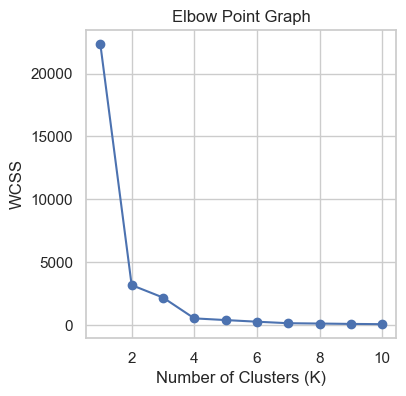

In [6]:
plt.figure(figsize=(4,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init='auto')
Y = kmeans.fit_predict(X)


In [8]:
centroids = kmeans.cluster_centers_

Text(0, 0.5, 'Spending Score (1-100)')

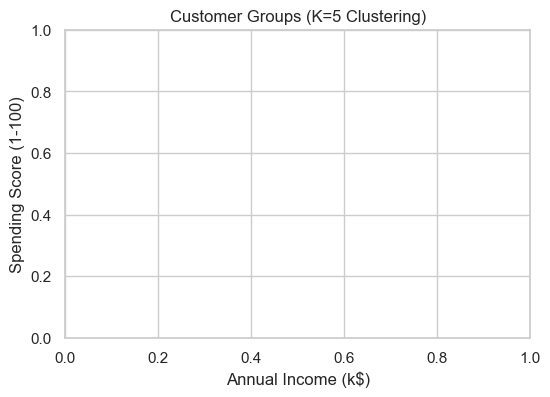

In [9]:
plt.figure(figsize=(6,4))
plt.title('Customer Groups (K=5 Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

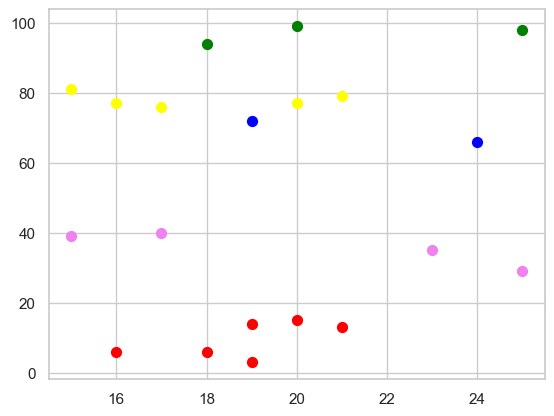

In [10]:
colors = ['green','red','yellow','violet','blue']
for i in range(5):
    plt.scatter(X[Y==i,0], X[Y==i,1], s=50, c=colors[i], label=f'Cluster {i+1}')

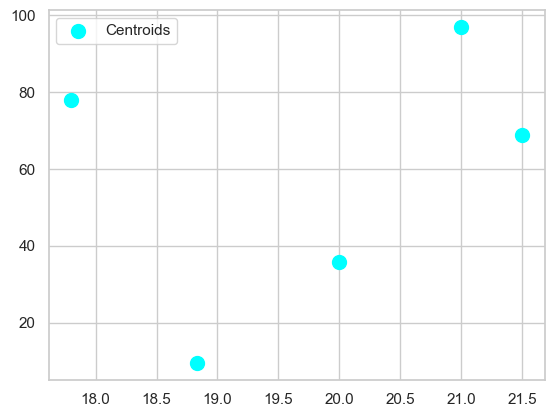

In [11]:
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='cyan', label='Centroids', marker='o')
plt.legend()
plt.show()